In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
# from tensorflow.keras.models import it
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [3]:
X.shape

(100, 2)

<Axes: >

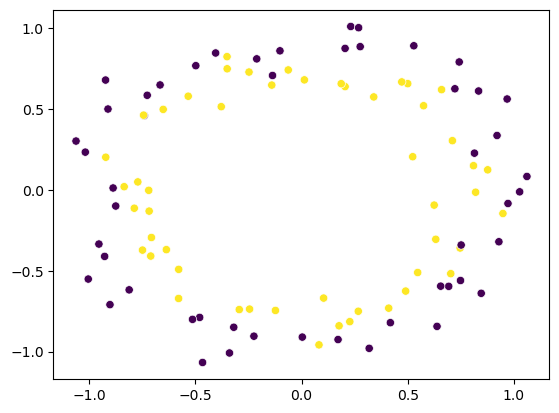

In [4]:
sns.scatterplot(x=X[:,0],y= X[:,1],c=y)

In [5]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)


In [6]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4812 - loss: 0.6951 - val_accuracy: 0.6500 - val_loss: 0.6823
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4641 - loss: 0.6936 - val_accuracy: 0.6500 - val_loss: 0.6858
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4914 - loss: 0.6918 - val_accuracy: 0.5500 - val_loss: 0.6886
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 0.6895 - val_accuracy: 0.5500 - val_loss: 0.6917
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5305 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5680 - loss: 0.6886 - val_accuracy: 0.4500 - val_loss: 0.6962
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5703 - loss: 0.6874 - val_accuracy: 0.4500 - val_loss: 0.6976
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5703 - loss: 0.6858 - val_accuracy: 0.4500 - val_loss

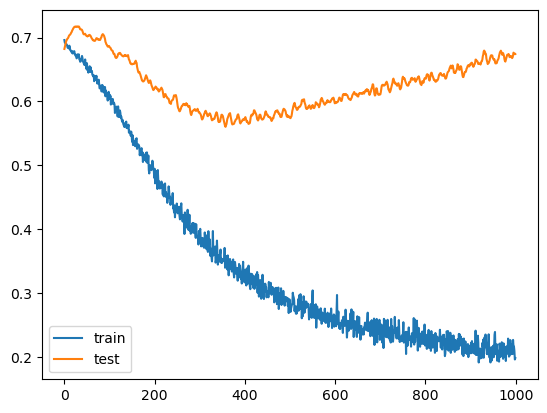

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 174us/step


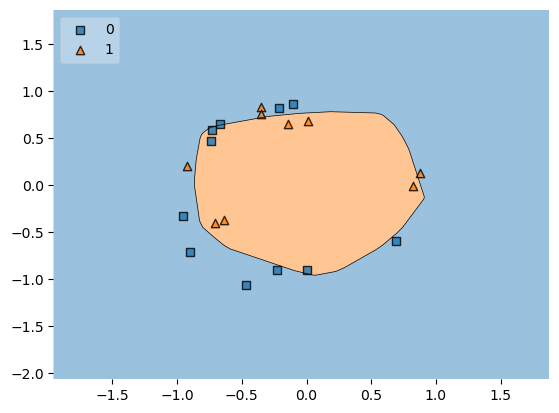

In [10]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [11]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:

callback= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.000000001,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [18]:

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks=callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6359 - loss: 0.6646 - val_accuracy: 0.4500 - val_loss: 0.7202
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6047 - loss: 0.6702 - val_accuracy: 0.4500 - val_loss: 0.7196
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5773 - loss: 0.6715 - val_accuracy: 0.4500 - val_loss: 0.7189
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6031 - loss: 0.6662 - val_accuracy: 0.4500 - val_loss: 0.7191
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5836 - loss: 0.6701 - val_accuracy: 0.4500 - val_loss: 0.7192
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6680 - loss: 0.6633 - val_accuracy: 0.4500 - val_loss: 0.7193
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5891 - loss: 0.6686 - val_accuracy: 0.4500 - val_loss: 0.7186
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5813 - loss: 0.6680 - val_accuracy: 0.4500 - val_loss

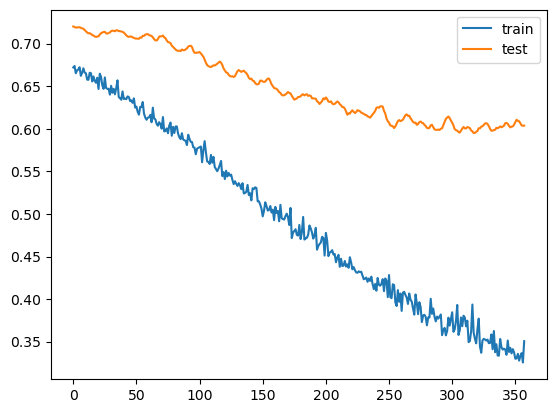

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 177us/step


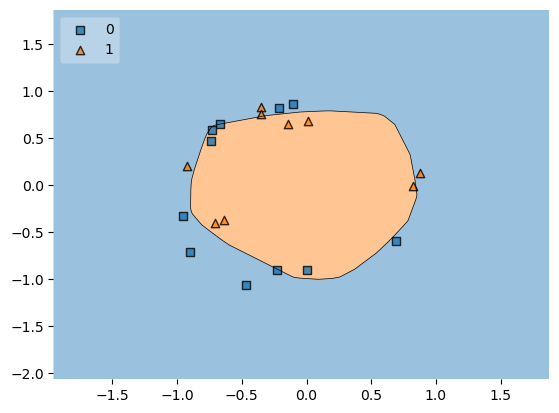

In [20]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()